In [34]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import set_style
set_style('whitegrid')
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (15, 10)
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
sns.set_style("whitegrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))
#sns.mpl.rc("font", size=14)

In [35]:
gross_data = pd.read_csv('https://raw.githubusercontent.com/tacookson/data/master/broadway-grosses/grosses.csv',parse_dates = ['week_ending'])
show_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/show_info_1985-2019.csv')
CPI_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/CPI_USBLS.csv', parse_dates = ['DATE'])

In [36]:
CPI_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/CPI_USBLS.csv', parse_dates = ['DATE'])
CPI_data.rename(columns = {'CWSR0000SA0':'CPI'}, inplace = True)
gross_data['year'] = gross_data['week_ending'].dt.year
gross_data['month_c'] = [d.strftime('%b') for d in gross_data.week_ending]
gross_data['month'] = gross_data['week_ending'].dt.month
CPI_data['year'] = CPI_data['DATE'].dt.year
CPI_data['month']= CPI_data['DATE'].dt.month
gross_data

,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews,year,month_c,month
0,1985-06-09,1,3915937.00,42nd Street,St. James Theatre,282368.00,NaN,30.42,NaN,9281,1655,0.7010,8,0,1985,Jun,6
1,1985-06-09,1,3915937.00,A Chorus Line,Sam S. Shubert Theatre,222584.00,NaN,27.25,NaN,8167,1472,0.6935,8,0,1985,Jun,6
2,1985-06-09,1,3915937.00,Aren't We All?,Brooks Atkinson Theatre,249272.00,NaN,33.75,NaN,7386,1088,0.8486,8,0,1985,Jun,6
3,1985-06-09,1,3915937.00,Arms and the Man,Circle in the Square Theatre,95688.00,NaN,20.87,NaN,4586,682,0.8405,8,0,1985,Jun,6
4,1985-06-09,1,3915937.00,As Is,Lyceum Theatre,61059.00,NaN,20.78,NaN,2938,684,0.5369,8,0,1985,Jun,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47519,2020-03-01,40,26109896.25,The Phantom of the Opera,Majestic Theatre,639215.93,1358986.0,72.18,213.0,8856,1605,0.6897,8,0,2020,Mar,3
47520,2020-03-01,40,26109896.25,Tina: The Tina Turner Musical,Lunt-Fontanne Theatre,1320766.00,1566688.0,132.02,297.0,10004,1478,0.8461,8,0,2020,Mar,3
47521,2020-03-01,40,26109896.25,To Kill A Mockingbird,Sam S. Shubert Theatre,1132278.54,1549625.0,115.41,423.0,9811,1435,0.9767,7,0,2020,Mar,3
47522,2020-03-01,40,26109896.25,West Side Story,Broadway Theatre,1598947.32,1722464.0,114.87,373.0,13920,1740,1.0000,8,0,2020,Mar,3


In [37]:
CPI_data['CPI'] = CPI_data.iloc[-1]['CPI']/CPI_data['CPI']
CPI_data

,DATE,CPI,year,month
0,1947-01-01,13.148889,1947,1
1,1947-02-01,13.064213,1947,2
2,1947-03-01,12.839783,1947,3
3,1947-04-01,12.839783,1947,4
4,1947-05-01,12.863043,1947,5
...,...,...,...,...
899,2021-12-01,1.031327,2021,12
900,2022-01-01,1.024507,2022,1
901,2022-02-01,1.015750,2022,2
902,2022-03-01,1.001908,2022,3


In [38]:
CPI_data2 = CPI_data[['CPI','month','year']]
gross_data2 = gross_data.merge(CPI_data2, how = 'left', on = ['month', 'year'])
gross_data['weekly_gross_overall'] = gross_data2['weekly_gross_overall']*gross_data2['CPI']
gross_data['weekly_gross'] = gross_data2['weekly_gross']*gross_data2['CPI']
gross_data['avg_ticket_price'] = gross_data2['avg_ticket_price']*gross_data2['CPI']
gross_data['potential_gross'] = gross_data2['potential_gross']*gross_data2['CPI']
gross_data['top_ticket_price']= gross_data2['top_ticket_price']*gross_data2['CPI']
gross_data['year']=gross_data.year.astype(int).astype(str)
gross_data


,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews,year,month_c,month
0,1985-06-09,1,1.040401e+07,42nd Street,St. James Theatre,7.502061e+05,NaN,80.821017,NaN,9281,1655,0.7010,8,0,1985,Jun,6
1,1985-06-09,1,1.040401e+07,A Chorus Line,Sam S. Shubert Theatre,5.913697e+05,NaN,72.398840,NaN,8167,1472,0.6935,8,0,1985,Jun,6
2,1985-06-09,1,1.040401e+07,Aren't We All?,Brooks Atkinson Theatre,6.622754e+05,NaN,89.668288,NaN,7386,1088,0.8486,8,0,1985,Jun,6
3,1985-06-09,1,1.040401e+07,Arms and the Man,Circle in the Square Theatre,2.542275e+05,NaN,55.448213,NaN,4586,682,0.8405,8,0,1985,Jun,6
4,1985-06-09,1,1.040401e+07,As Is,Lyceum Theatre,1.622239e+05,NaN,55.209097,NaN,2938,684,0.5369,8,0,1985,Jun,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47519,2020-03-01,40,2.949006e+07,The Phantom of the Opera,Majestic Theatre,7.219681e+05,1.534919e+06,81.524345,240.574751,8856,1605,0.6897,8,0,2020,Mar,3
47520,2020-03-01,40,2.949006e+07,Tina: The Tina Turner Musical,Lunt-Fontanne Theatre,1.491751e+06,1.769510e+06,149.111167,335.449300,10004,1478,0.8461,8,0,2020,Mar,3
47521,2020-03-01,40,2.949006e+07,To Kill A Mockingbird,Sam S. Shubert Theatre,1.278862e+06,1.750238e+06,130.350854,477.761125,9811,1435,0.9767,7,0,2020,Mar,3
47522,2020-03-01,40,2.949006e+07,West Side Story,Broadway Theatre,1.805945e+06,1.945452e+06,129.740947,421.288179,13920,1740,1.0000,8,0,2020,Mar,3


<AxesSubplot:xlabel='year', ylabel='weekly_gross_overall'>

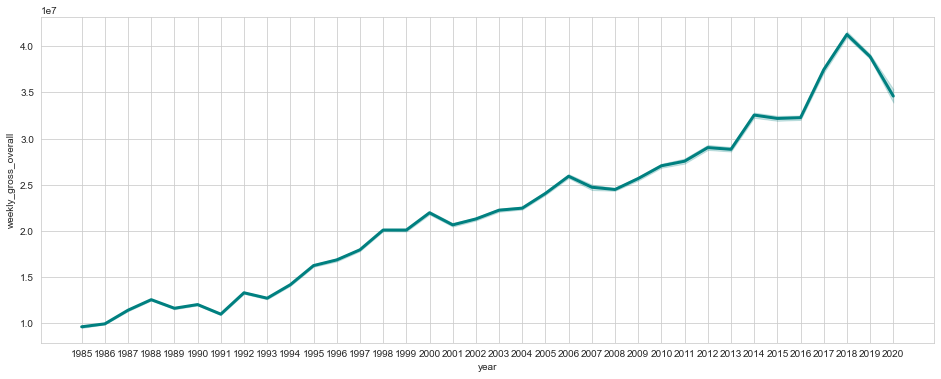

In [39]:
sns.lineplot(x=gross_data.year,y=gross_data.weekly_gross_overall,color="teal",linewidth="3")


,HOUSTNSA
DATE,
1959-01-01,96.2
1959-02-01,99.0
1959-03-01,127.7
1959-04-01,150.8
1959-05-01,152.5
...,...
2019-02-01,80.0
2019-03-01,98.2
2019-04-01,116.6


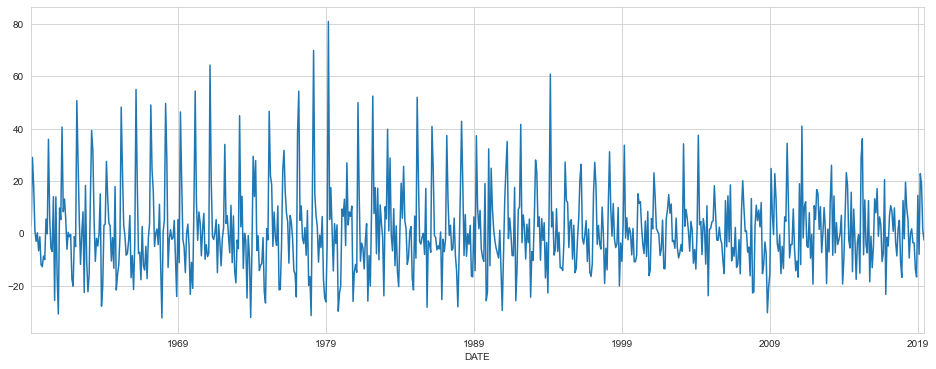

In [98]:
data = pdr.get_data_fred("HOUSTNSA", "1959-01-01", "2019-06-01")
housing = data.HOUSTNSA.pct_change().dropna()
# Scale by 100 to get percentages
housing = 100 * housing.asfreq("MS")
fig, ax = plt.subplots()
ax = housing.plot(ax=ax)
data

In [130]:
df = gross_data[['weekly_gross','week_ending','year','month']]
df2 = df.groupby(['month','year']).mean().reset_index()
df2

,month,year,weekly_gross
0,1,1986,4.583089e+05
1,1,1987,4.960863e+05
2,1,1988,6.185592e+05
3,1,1989,6.117463e+05
4,1,1990,6.021372e+05
...,...,...,...
413,12,2015,9.810485e+05
414,12,2016,1.128952e+06
415,12,2017,1.380320e+06
416,12,2018,1.288233e+06


In [131]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         418 non-null    int64  
 1   year          418 non-null    object 
 2   weekly_gross  418 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.9+ KB


In [135]:
cols = ['year','month','day']
df2['day'] = [1 for _ in range(df2.shape[0])]
df2['date'] = df2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df2['date']=pd.to_datetime(df2['date'])
df2

,month,year,weekly_gross,day,date
0,1,1986,4.583089e+05,1,1986-01-01
1,1,1987,4.960863e+05,1,1987-01-01
2,1,1988,6.185592e+05,1,1988-01-01
3,1,1989,6.117463e+05,1,1989-01-01
4,1,1990,6.021372e+05,1,1990-01-01
...,...,...,...,...,...
413,12,2015,9.810485e+05,1,2015-12-01
414,12,2016,1.128952e+06,1,2016-12-01
415,12,2017,1.380320e+06,1,2017-12-01
416,12,2018,1.288233e+06,1,2018-12-01


In [139]:
df3 = df2[['date','weekly_gross']]
df3.set_index(['date'], inplace = True)
df3

,weekly_gross
date,
1986-01-01,4.583089e+05
1987-01-01,4.960863e+05
1988-01-01,6.185592e+05
1989-01-01,6.117463e+05
1990-01-01,6.021372e+05
...,...
2015-12-01,9.810485e+05
2016-12-01,1.128952e+06
2017-12-01,1.380320e+06


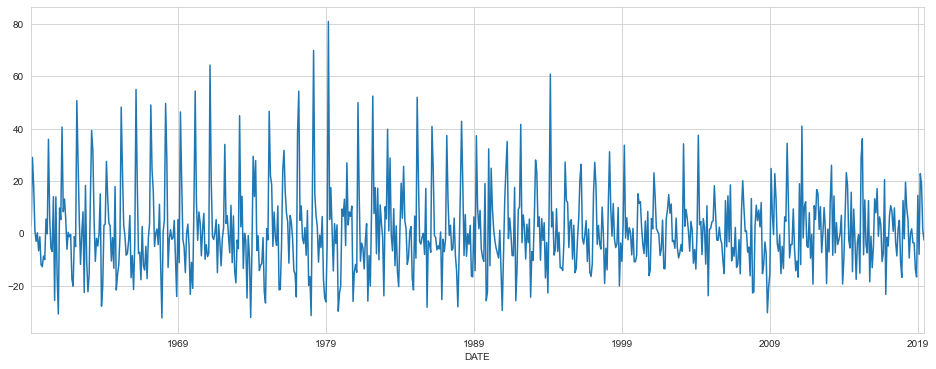

In [140]:
gross = df3.weekly_gross.pct_change().dropna()
# Scale by 100 to get percentages
gross = 100 * gross.asfreq("MS")
fig, ax = plt.subplots()
ax = housing.plot(ax=ax)

In [141]:
mod = AutoReg(gross, 3, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:           weekly_gross   No. Observations:                  396
Model:                     AutoReg(3)   Log Likelihood               -1517.834
Method:               Conditional MLE   S.D. of innovations             11.510
Date:                Fri, 03 Jun 2022   AIC                           3045.669
Time:                        00:27:25   BIC                           3065.538
Sample:                    04-01-1987   HQIC                          3053.543
                         - 12-01-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.4634      0.612      2.392      0.017       0.264       2.663
weekly_gross.L1     0.4174      0.050      8.272      0.000       0.319       0.516
weekly_gross.L2     0.1244      

In [142]:
res = mod.fit(cov_type="HC0")
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:           weekly_gross   No. Observations:                  396
Model:                     AutoReg(3)   Log Likelihood               -1517.834
Method:               Conditional MLE   S.D. of innovations             11.510
Date:                Fri, 03 Jun 2022   AIC                           3045.669
Time:                        00:27:45   BIC                           3065.538
Sample:                    04-01-1987   HQIC                          3053.543
                         - 12-01-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.4634      0.690      2.120      0.034       0.110       2.816
weekly_gross.L1     0.4174      0.100      4.185      0.000       0.222       0.613
weekly_gross.L2     0.1244      

In [143]:
sel = ar_select_order(gross, 13, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:           weekly_gross   No. Observations:                  396
Model:                    AutoReg(13)   Log Likelihood               -1429.214
Method:               Conditional MLE   S.D. of innovations             10.102
Date:                Fri, 03 Jun 2022   AIC                           2888.427
Time:                        00:27:59   BIC                           2947.648
Sample:                    02-01-1988   HQIC                          2911.919
                         - 12-01-2019                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.3960      0.608      3.941      0.000       1.205       3.588
weekly_gross.L1      0.3782      0.050      7.495      0.000       0.279       0.477
weekly_gross.L2      0.1546 

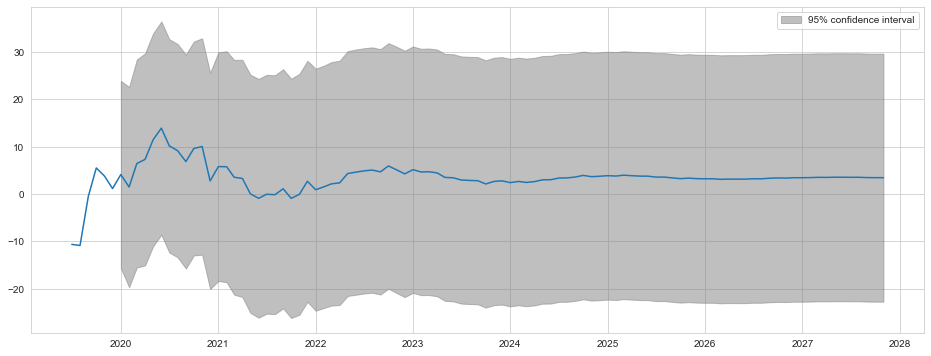

In [149]:
fig = res.plot_predict(390, 490)

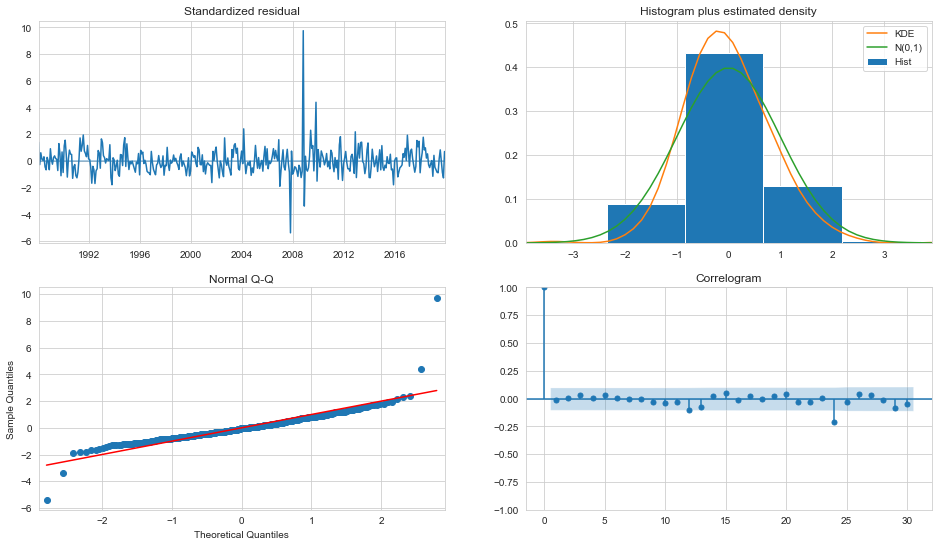

In [150]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [151]:
sel = ar_select_order(gross, 13, seasonal=True, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:           weekly_gross   No. Observations:                  396
Model:              Seas. AutoReg(13)   Log Likelihood               -1428.103
Method:               Conditional MLE   S.D. of innovations             10.072
Date:                Fri, 03 Jun 2022   AIC                           2908.207
Time:                        00:32:35   BIC                           3010.856
Sample:                    02-01-1988   HQIC                          2948.926
                         - 12-01-2019                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.8958      1.843      1.029      0.304      -1.716       5.508
s(2,12)              0.6582      2.545      0.259      0.796      -4.329       5.645
s(3,12)              0.3584 

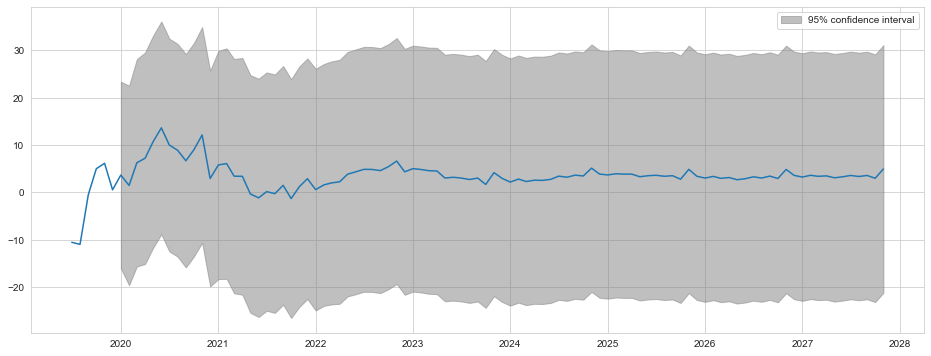

In [153]:
fig = res.plot_predict(390, 490)

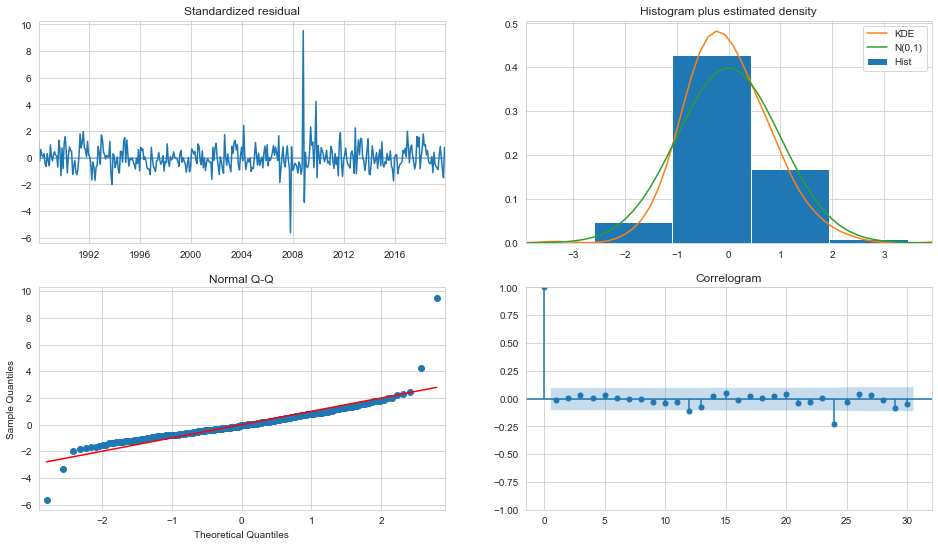

In [154]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(lags=30, fig=fig)

## Seasonal Dynamics

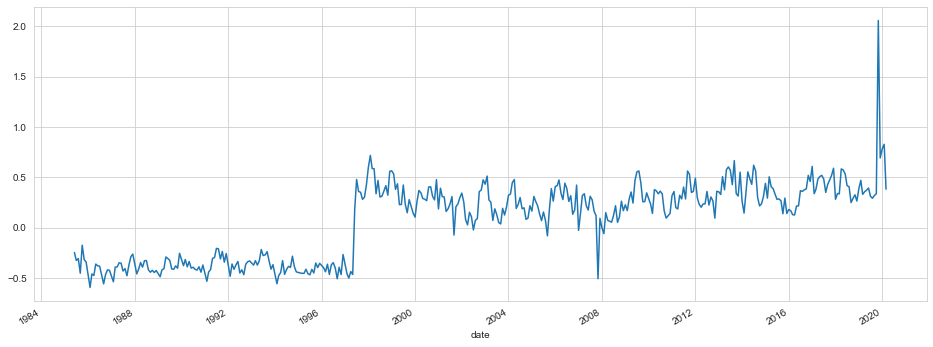

In [155]:
yoy_gross = df3.weekly_gross.pct_change(12).resample("MS").last().dropna()
_, ax = plt.subplots()
ax = yoy_gross.plot(ax=ax)

In [157]:
sel = ar_select_order(yoy_gross, 13, old_names=False)
sel.ar_lags

[1, 2, 3]

In [158]:
sel = ar_select_order(yoy_gross, 13, glob=True, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:           weekly_gross   No. Observations:                  406
Model:             Restr. AutoReg(10)   Log Likelihood                 190.391
Method:               Conditional MLE   S.D. of innovations              0.150
Date:                Fri, 03 Jun 2022   AIC                           -368.781
Time:                        00:35:13   BIC                           -344.893
Sample:                            10   HQIC                          -359.317
                                  406                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0102      0.008      1.316      0.188      -0.005       0.025
weekly_gross.L1      0.4920      0.050      9.844      0.000       0.394       0.590
weekly_gross.L2      0.2187 

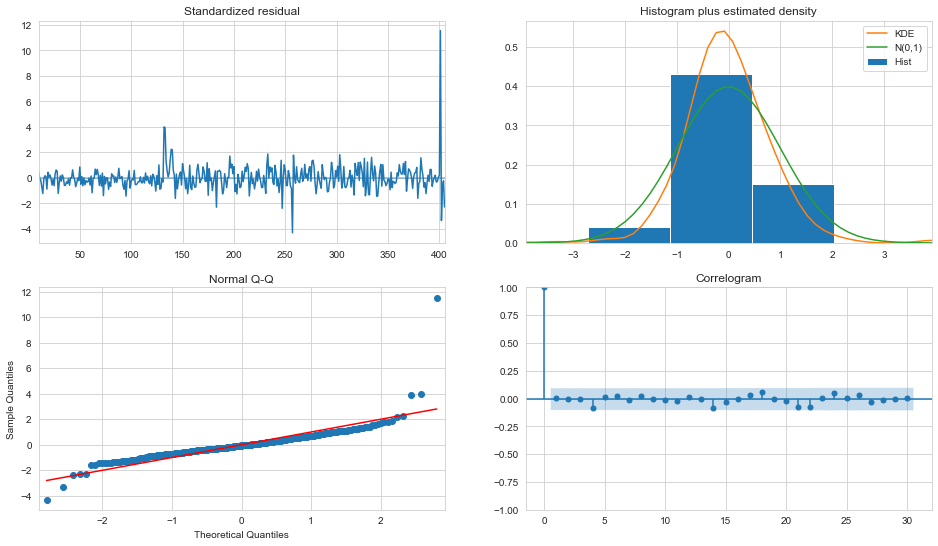

In [159]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)

### Incomplete->left here and transitioning to another method

In [162]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(gross.index, constant=True, period=12, fourier=2)
mod = AutoReg(gross, 2, trend="n", seasonal=False, deterministic=dp)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:           weekly_gross   No. Observations:                  396
Model:                     AutoReg(2)   Log Likelihood               -1521.426
Method:               Conditional MLE   S.D. of innovations             11.502
Date:                Fri, 03 Jun 2022   AIC                           3058.852
Time:                        00:37:30   BIC                           3090.662
Sample:                    03-01-1987   HQIC                          3071.457
                         - 12-01-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.5197      0.606      2.509      0.012       0.332       2.707
sin(1,12)          -0.2498      0.818     -0.305      0.760      -1.853       1.354
cos(1,12)           0.1898      

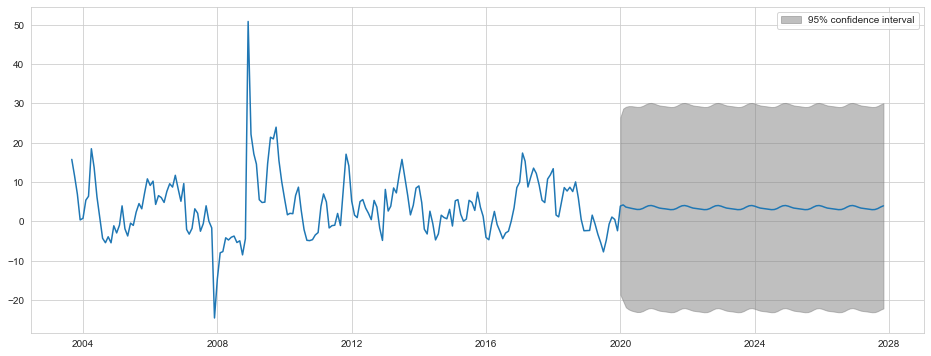

In [164]:
fig = res.plot_predict(200, 490)

<AxesSubplot:xlabel='date'>

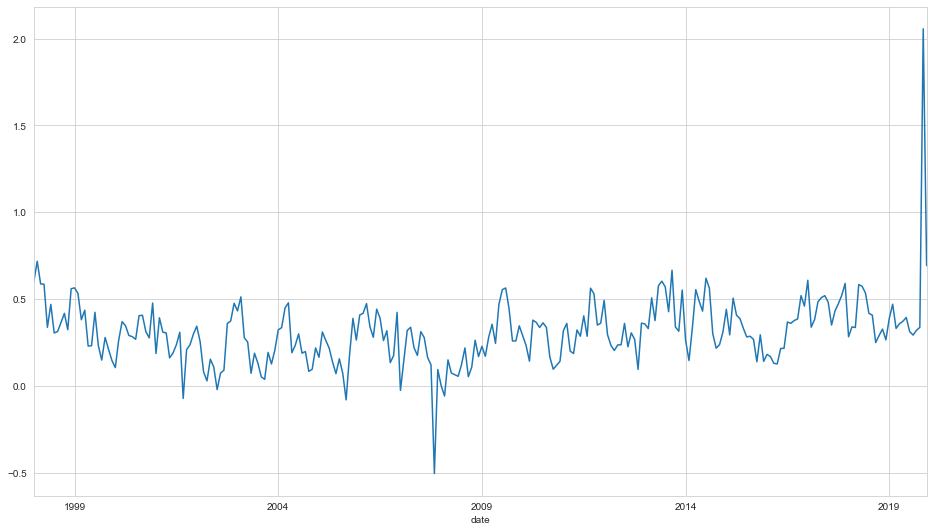

In [166]:
gross = df3.weekly_gross.pct_change(12).dropna().asfreq("MS")
_, ax = plt.subplots(figsize=(16, 9))
gross.plot(ax=ax)

In [168]:
sel = ar_select_order(gross, 13, "bic", old_names=False)
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:           weekly_gross   No. Observations:                  264
Model:                     AutoReg(2)   Log Likelihood                 104.045
Method:               Conditional MLE   S.D. of innovations              0.163
Date:                Fri, 03 Jun 2022   AIC                           -200.091
Time:                        00:40:09   BIC                           -185.817
Sample:                    03-01-1998   HQIC                          -194.354
                         - 12-01-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1133      0.023      4.990      0.000       0.069       0.158
weekly_gross.L1     0.3821      0.062      6.195      0.000       0.261       0.503
weekly_gross.L2     0.2516      

In [170]:
sel = ar_select_order(gross, 13, "bic", glob=True, old_names=False)
sel.ar_lags
res_glob = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:           weekly_gross   No. Observations:                  264
Model:                     AutoReg(2)   Log Likelihood                 104.045
Method:               Conditional MLE   S.D. of innovations              0.163
Date:                Fri, 03 Jun 2022   AIC                           -200.091
Time:                        00:40:29   BIC                           -185.817
Sample:                    03-01-1998   HQIC                          -194.354
                         - 12-01-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1133      0.023      4.990      0.000       0.069       0.158
weekly_gross.L1     0.3821      0.062      6.195      0.000       0.261       0.503
weekly_gross.L2     0.2516      

In [171]:
gross.shape

(264,)

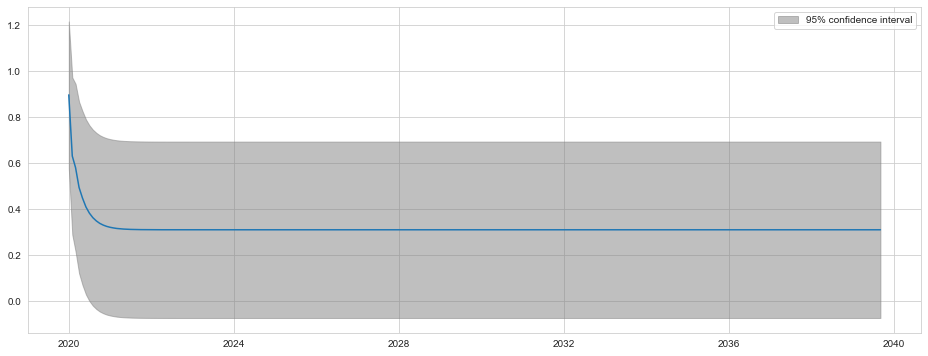

In [172]:
fig = res_glob.plot_predict(start=264, end=500)


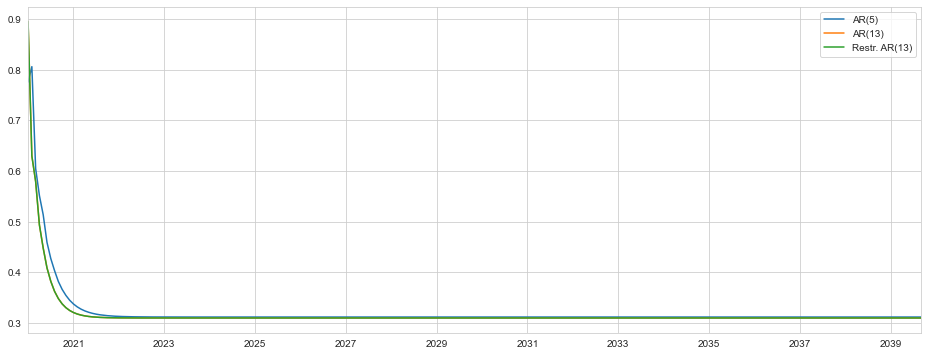

In [186]:
res_ar5 = AutoReg(gross, 5, old_names=False).fit()
predictions = pd.DataFrame(
    {
        "AR(5)": res_ar5.predict(start=264, end=500),
        "AR(13)": res.predict(start=264, end=500),
        "Restr. AR(13)": res_glob.predict(start=264, end=500),
    }
)
_, ax = plt.subplots()
ax = predictions.plot(ax=ax)

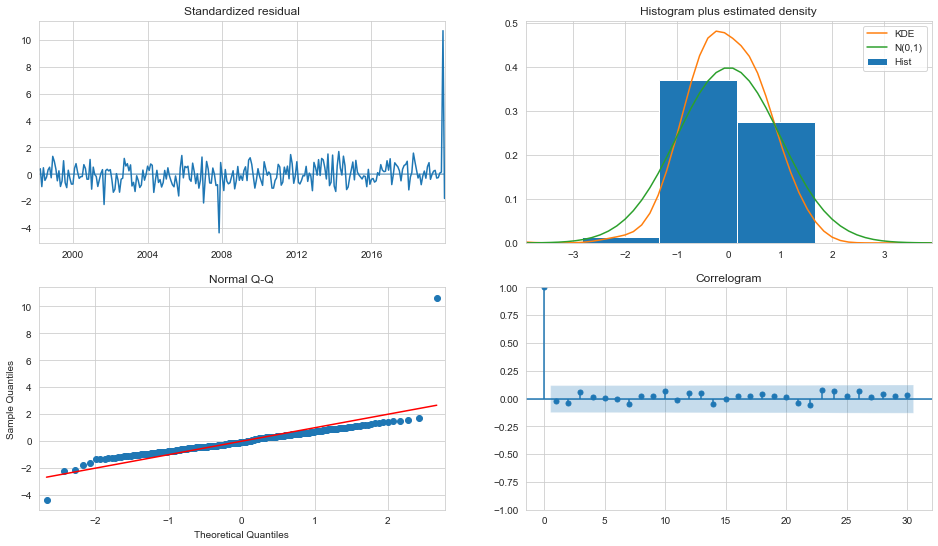

In [178]:
fig = plt.figure(figsize=(16, 9))
fig = res_glob.plot_diagnostics(fig=fig, lags=30)

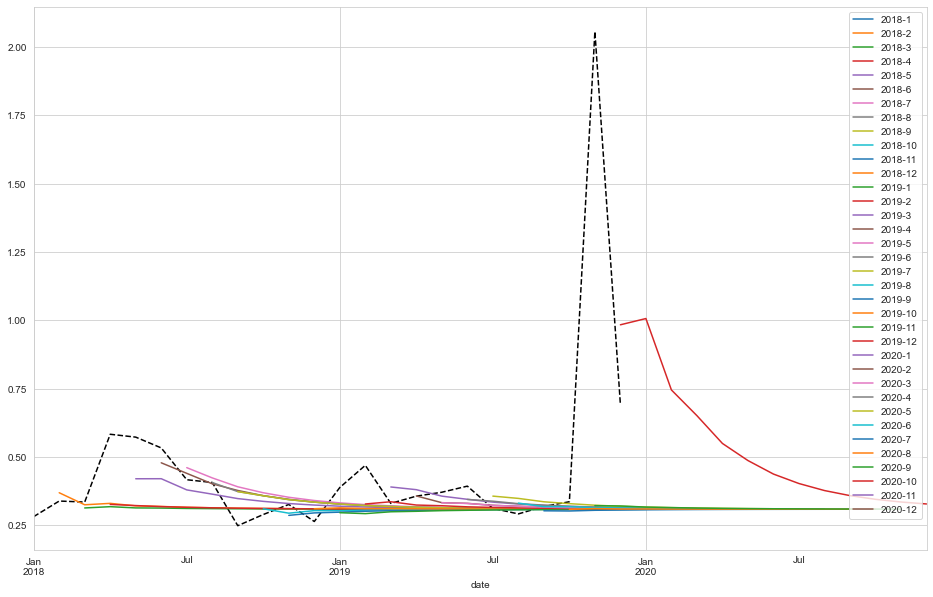

In [181]:
import numpy as np

start = gross.index[-24]
forecast_index = pd.date_range(start, freq=gross.index.freq, periods=36)
cols = ["-".join(str(val) for val in (idx.year, idx.month)) for idx in forecast_index]
forecasts = pd.DataFrame(index=forecast_index, columns=cols)
for i in range(1, 24):
    fcast = res_glob.predict(
        start=forecast_index[i], end=forecast_index[i + 12], dynamic=True
    )
    forecasts.loc[fcast.index, cols[i]] = fcast
_, ax = plt.subplots(figsize=(16, 10))
gross.iloc[-24:].plot(ax=ax, color="black", linestyle="--")
ax = forecasts.plot(ax=ax)

In [183]:
from statsmodels.tsa.api import SARIMAX

sarimax_mod = SARIMAX(gross, order=((1, 5, 12, 13), 0, 0), trend="c")
sarimax_res = sarimax_mod.fit()
print(sarimax_res.summary())

                                     SARIMAX Results                                     
Dep. Variable:                      weekly_gross   No. Observations:                  264
Model:             SARIMAX([1, 5, 12, 13], 0, 0)   Log Likelihood                 100.062
Date:                           Fri, 03 Jun 2022   AIC                           -188.123
Time:                                   00:44:17   BIC                           -166.668
Sample:                               01-01-1998   HQIC                          -179.502
                                    - 12-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1051      0.037      2.854      0.004       0.033       0.177
ar.L1          0.4716      0.034     13.755